In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import timedelta
plt.style.use('ggplot')
% matplotlib inline
import os

In [2]:
def load_dataframe(fname):
    with open(fname) as f:
        raw = json.load(f)
    for i in range(len(raw['stats'][0])):
        raw["mean_%d" % i] = [x[i][0] for x in raw['stats']]
        raw["std_%d" % i] = [x[i][1] for x in raw['stats']]
    raw["mean_agg"], raw["mean_std"] = zip(*[np.mean(x, axis=0) for x in raw['stats']])
    df = pd.DataFrame(data=raw)
    return df

# Hyperparam sweep - Synchronization, ADAM, Number of Models

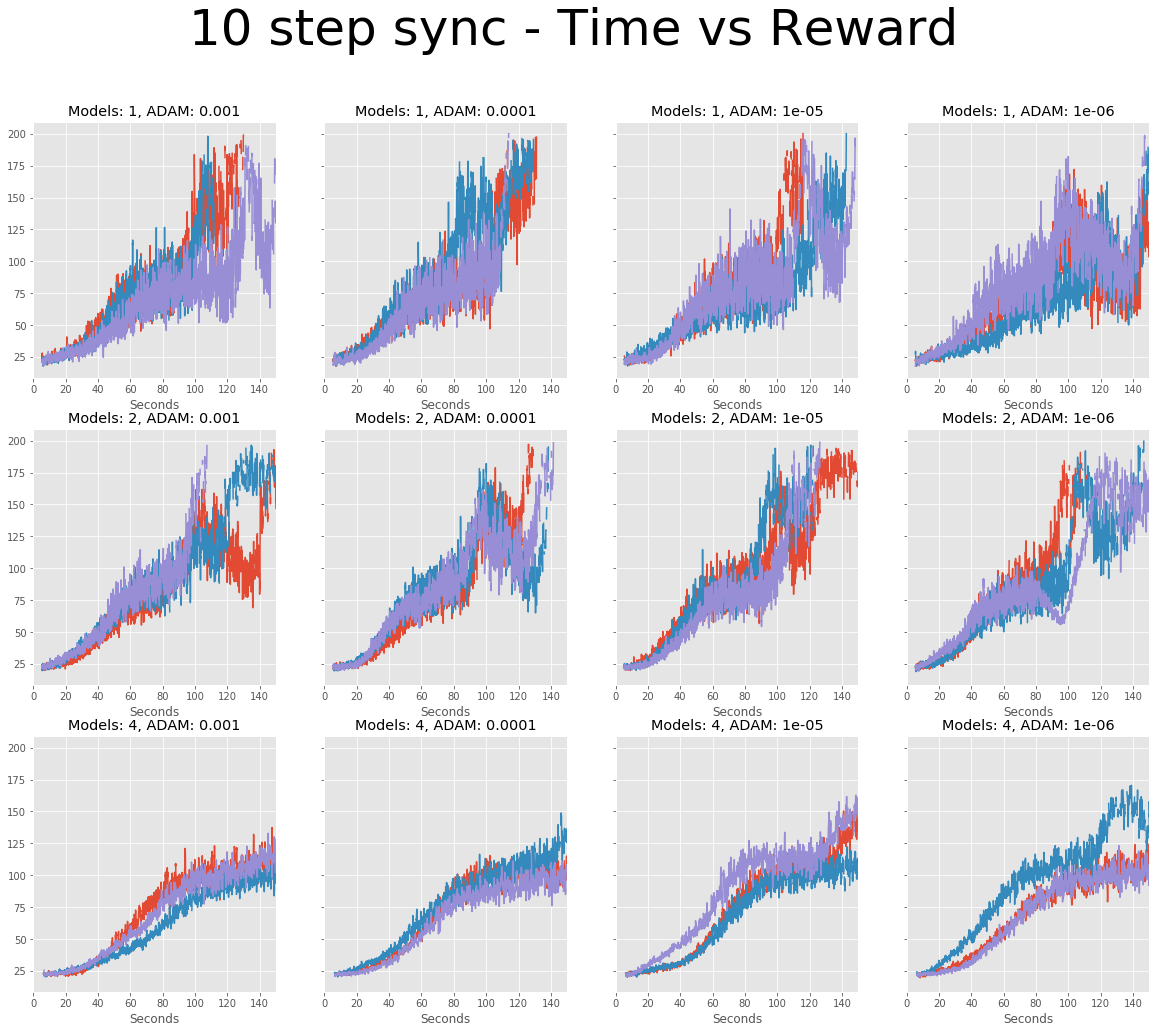

In [41]:
fig, axes = plt.subplots(3, 4 ,figsize=(20,16), sharey=True)
fig.suptitle("10 step sync - Time vs Reward", fontsize=50)
for j, model in enumerate([1, 2, 4]):
    for i, adam in enumerate(["0.001", "0.0001", "1e-05","1e-06"]):
        paths = [os.path.join(x[0], y) for x in os.walk("./e{0}w6_adam{1}_sync10/".format(model, adam)) for y in x[-1] ]
        for fname in paths:
            df = load_dataframe(fname)
            m = df['mean_agg'].rolling(5, ).mean()
            axes[j][i].plot(df['TS'], m)
            axes[j][i].set_title("Models: %d, ADAM: %s" % (model, adam))
    #         m.plot(xticks=df['TS'], ax=axes[i], title=adam)
    #         print(str(timedelta(seconds=df["TS"].max())))
            axes[j][i].set_xlim([0, 150])
            axes[j][i].set_xlabel("Seconds")

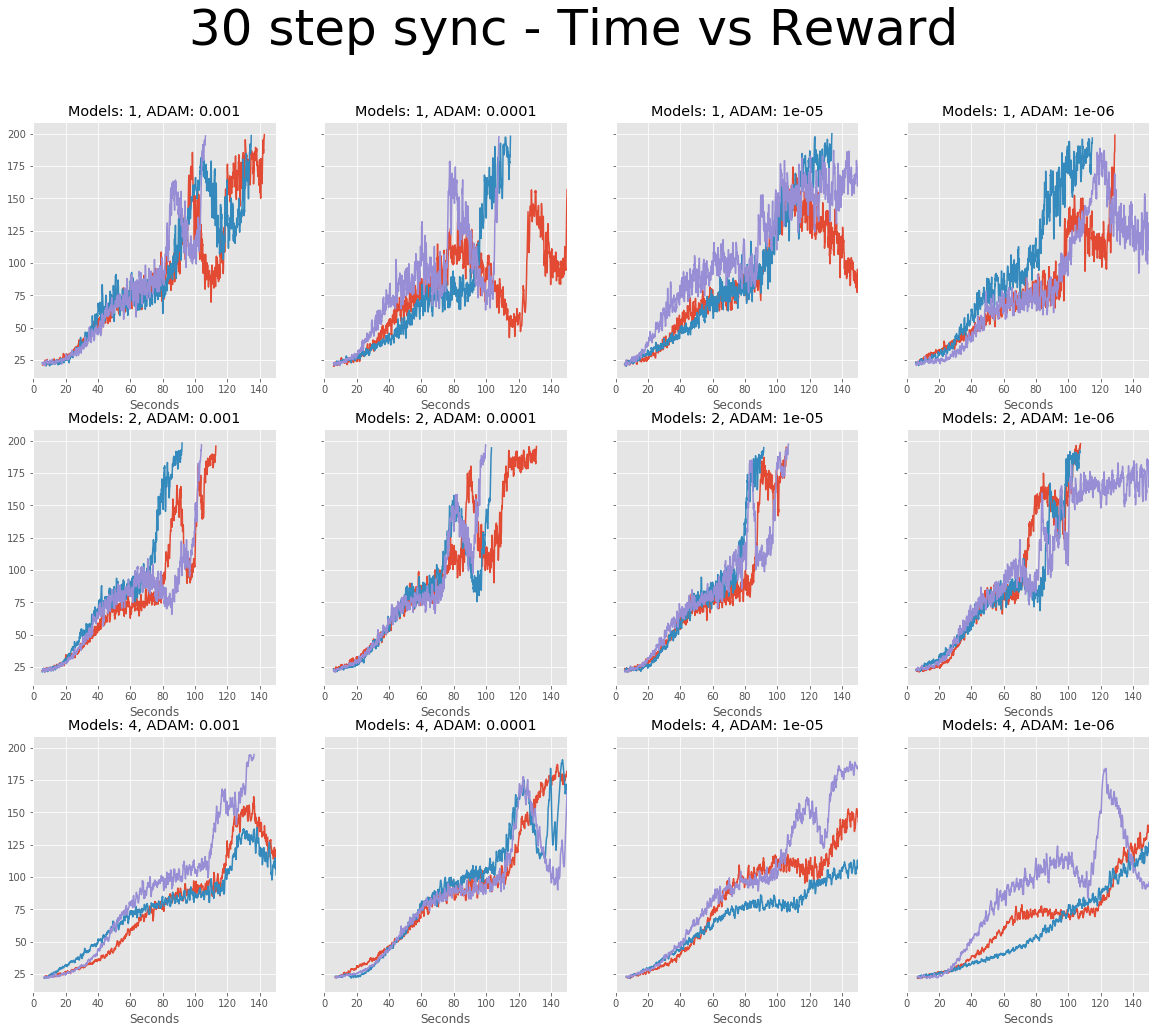

In [42]:
fig, axes = plt.subplots(3, 4 ,figsize=(20,16), sharey=True)
fig.suptitle("30 step sync - Time vs Reward", fontsize=50)
for j, model in enumerate([1, 2, 4]):
    for i, adam in enumerate(["0.001", "0.0001", "1e-05","1e-06"]):
        paths = [os.path.join(x[0], y) for x in os.walk("./e{0}w6_adam{1}_sync30/".format(model, adam)) for y in x[-1] ]
        for fname in paths:
            df = load_dataframe(fname)
            m = df['mean_agg'].rolling(5, ).mean()
            axes[j][i].plot(df['TS'], m)
            axes[j][i].set_title("Models: %d, ADAM: %s" % (model, adam))
    #         m.plot(xticks=df['TS'], ax=axes[i], title=adam)
    #         print(str(timedelta(seconds=df["TS"].max())))
            axes[j][i].set_xlim([0, 150])
            axes[j][i].set_xlabel("Seconds")

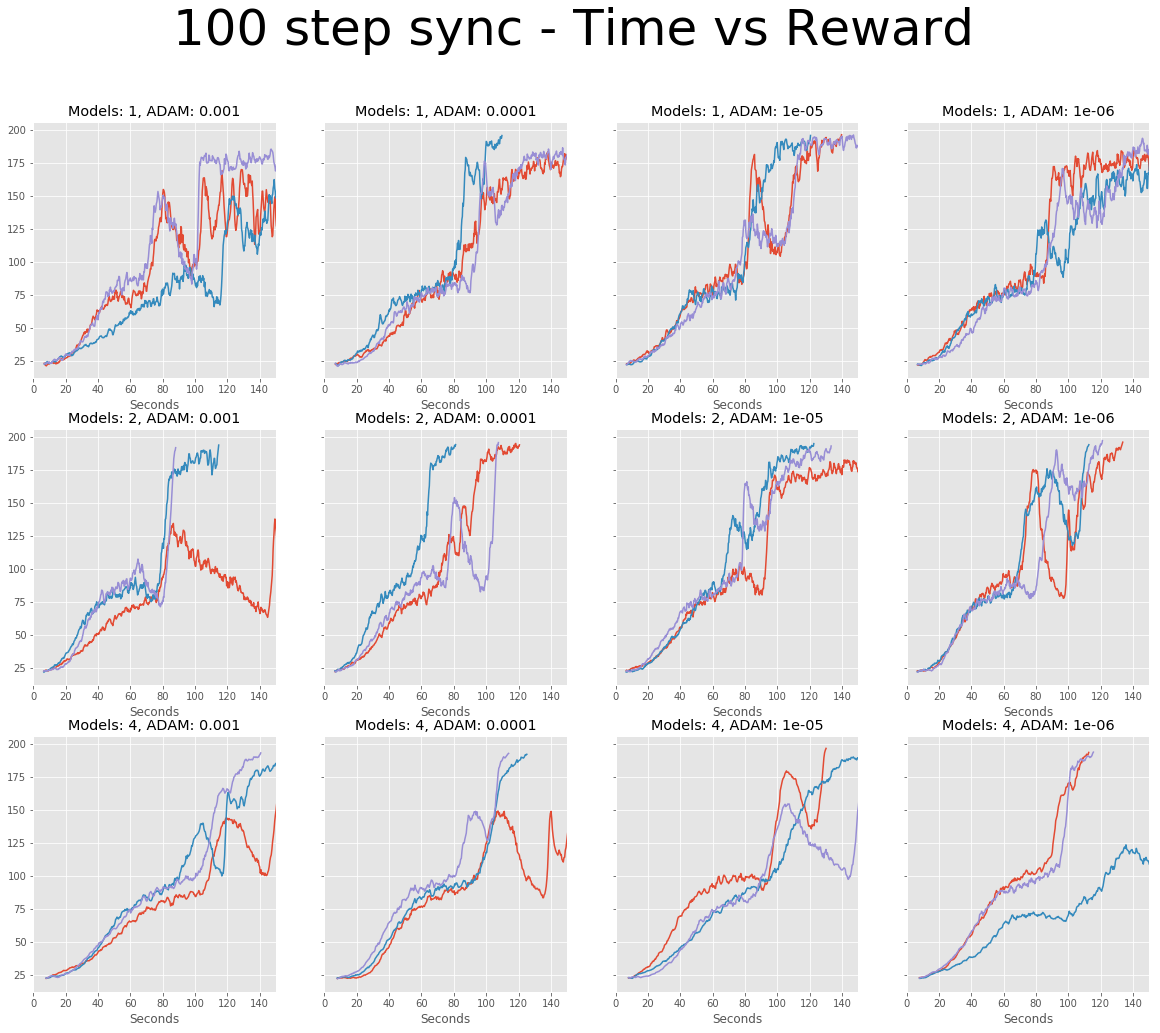

In [45]:
fig, axes = plt.subplots(3, 4 ,figsize=(20,16), sharey=True)
fig.suptitle("100 step sync - Time vs Reward", fontsize=50)
for j, model in enumerate([1, 2, 4]):
    for i, adam in enumerate(["0.001", "0.0001", "1e-05","1e-06"]):
        paths = [os.path.join(x[0], y) for x in os.walk("./e{0}w6_adam{1}_sync100/".format(model, adam)) for y in x[-1] ]
        for fname in paths:
            df = load_dataframe(fname)
            m = df['mean_agg'].rolling(5, ).mean()
            axes[j][i].plot(df['TS'], m)
            axes[j][i].set_title("Models: %d, ADAM: %s" % (model, adam))
    #         m.plot(xticks=df['TS'], ax=axes[i], title=adam)
    #         print(str(timedelta(seconds=df["TS"].max())))
            axes[j][i].set_xlim([0, 150])
            axes[j][i].set_xlabel("Seconds")

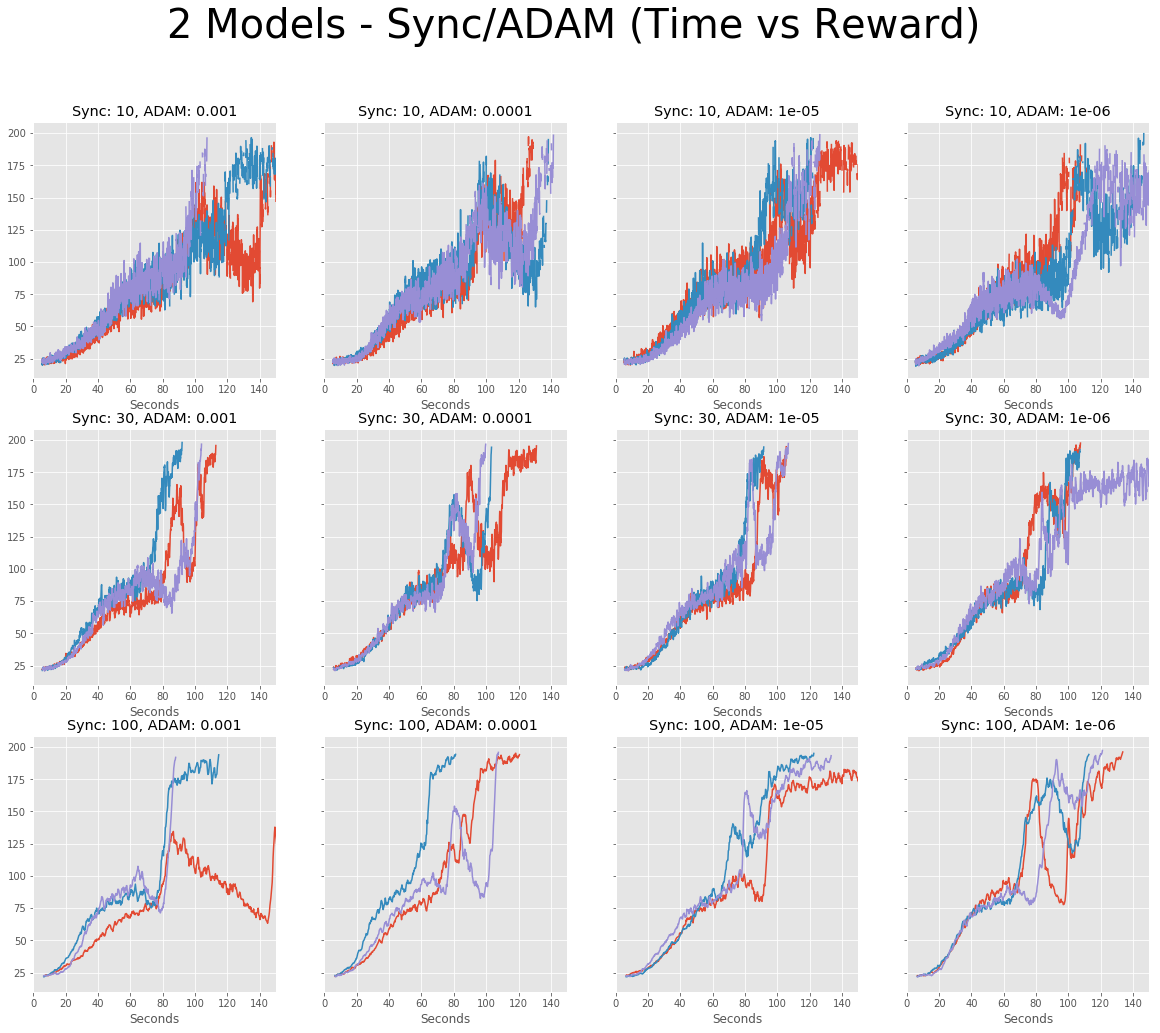

In [46]:
fig, axes = plt.subplots(3, 4 ,figsize=(20,16), sharey=True)
fig.suptitle("2 Models - Sync/ADAM (Time vs Reward)", fontsize=40)
for j, sync in enumerate([10, 30, 100]):
    for i, adam in enumerate(["0.001", "0.0001", "1e-05","1e-06"]):
        paths = [os.path.join(x[0], y) for x in os.walk("./e2w6_adam{0}_sync{1}/".format(adam, sync)) for y in x[-1] ]
        for fname in paths:
            df = load_dataframe(fname)
            m = df['mean_agg'].rolling(5, ).mean()
            axes[j][i].plot(df['TS'], m)
            axes[j][i].set_title("Sync: %d, ADAM: %s" % (sync, adam))
    #         m.plot(xticks=df['TS'], ax=axes[i], title=adam)
    #         print(str(timedelta(seconds=df["TS"].max())))
            axes[j][i].set_xlim([0, 150])
            axes[j][i].set_xlabel("Seconds")